# Step 1: Installation and Setup

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.12.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [4]:
# import the dataset
from tensorflow.keras.datasets import cifar10

In [5]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
y_train.shape, y_test.shape

((50000, 1), (10000, 1))

In [8]:
class_names = ['0 airplane','1 automobile','2 bird','3 cat','4 deer','5 dog','6 frog','7 horse','8 ship','9 truck']

In [9]:
class_names

['0 airplane',
 '1 automobile',
 '2 bird',
 '3 cat',
 '4 deer',
 '5 dog',
 '6 frog',
 '7 horse',
 '8 ship',
 '9 truck']

In [10]:
x_train.max(), x_train.min(), x_train.mean()

(255, 0, 120.70756512369792)

In [11]:
y_train.max(), y_train.min()

(9, 0)

In [12]:
# Normalize images
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
x_train.max(), x_train.min(), x_train.mean()

(1.0, 0.0, 0.4733630004850874)

In [14]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

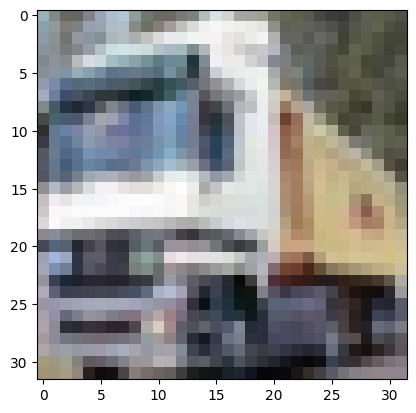

In [15]:
plt.imshow(x_train[1])

In [16]:
y_train[1]

array([9], dtype=uint8)

In [17]:
class_names[9]

'9 truck'

# Step 3: Building CNN model


In [18]:
# Defining the object as models
model = tf.keras.models.Sequential()

In [19]:
# Adding first CNN layer
# 1. filters (kernel) = 32
# 2. kernel size = 3
# 3. padding = same
# 4. Activation function = ReLU
# 5. Input shape = (32,32,3)

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [20]:
# Adding 2nd CNN layer and maxpool layers
# 1. filters (kernel) = 32
# 2. kernel size = 3
# 3. padding = same
# 4. Activation function = ReLU

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameteres,
# 1. pool_size = 2
# 2. strides = 2
# 3. padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides=2, padding='valid'))

In [21]:
# Adding 3rd CNN layer and maxpool layers
# 1. filters (kernel) = 64
# 2. kernel size = 3
# 3. padding = same
# 4. Activation function = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

In [22]:
# Adding 4th CNN layer and maxpool layers
# 1. filters (kernel) = 64
# 2. kernel size = 3
# 3. padding = same
# 4. Activation function = ReLU

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

# maxpool layer parameteres,
# 1. pool_size = 2
# 2. strides = 2
# 3. padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size= 2, strides=2, padding='valid'))

In [23]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(.40))

In [24]:
# Adding the flattening layer
model.add(tf.keras.layers.Flatten())

In [25]:
# Adding 1st dense layer
model.add(tf.keras.layers.Dense(units= 128, activation='relu'))

In [26]:
# Adding 2nd dense layer
model.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

In [27]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                    

# Step 4: Training the model

In [28]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ['sparse_categorical_accuracy'])


In [29]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
5000/5000 [==============================] - 367s 73ms/step - loss: 1.4447 - sparse_categorical_accuracy: 0.4731
Epoch 2/10
5000/5000 [==============================] - 366s 73ms/step - loss: 1.0598 - sparse_categorical_accuracy: 0.6250
Epoch 3/10
5000/5000 [==============================] - 365s 73ms/step - loss: 0.9211 - sparse_categorical_accuracy: 0.6761
Epoch 4/10
5000/5000 [==============================] - 363s 73ms/step - loss: 0.8313 - sparse_categorical_accuracy: 0.7072
Epoch 5/10
5000/5000 [==============================] - 347s 69ms/step - loss: 0.7697 - sparse_categorical_accuracy: 0.7298
Epoch 6/10
5000/5000 [==============================] - 343s 69ms/step - loss: 0.7171 - sparse_categorical_accuracy: 0.7463
Epoch 7/10
5000/5000 [==============================] - 343s 69ms/step - loss: 0.6703 - sparse_categorical_accuracy: 0.7641
Epoch 8/10
5000/5000 [==============================] - 343s 69ms/step - loss: 0.6364 - sparse_categorical_accuracy: 0.7751
Epoch 9/

# Step 5: Model Evaluation and Prediction

In [30]:
# evaluate the model performance
test_losss,  test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 20s 61ms/step - loss: 0.7756 - sparse_categorical_accuracy: 0.7429


In [32]:
print('test_losss:',test_losss)
print('\n test_accuracy:',test_accuracy)

test_losss: 0.7755526900291443

 test_accuracy: 0.742900013923645


In [34]:
# Predictions
y_pred_prob = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_prob, axis=1)

313/313 [==============================] - 15s 48ms/step


In [36]:
print(y_pred_classes[10]), print(y_test[10])

0
[0]


(None, None)

In [37]:
print(y_pred_classes[100]), print(y_test[100])

7
[4]


(None, None)

In [38]:
print(y_pred_classes[1300]), print(y_test[1300])

3
[4]


(None, None)

In [39]:
print(y_pred_classes[1003]), print(y_test[1003])

4
[4]


(None, None)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_classes)
cm

array([[780,  14,  41,  28,  19,   9,   6,  15,  50,  38],
       [ 15, 824,   3,   8,   0,   2,   6,   5,  18, 119],
       [ 54,   4, 596,  93,  78,  58,  67,  35,   9,   6],
       [ 13,   4,  51, 618,  44, 152,  41,  43,  12,  22],
       [ 17,   3,  51, 101, 654,  37,  57,  67,   7,   6],
       [  8,   3,  35, 206,  22, 652,  20,  49,   2,   3],
       [  6,   2,  26,  87,  26,  13, 817,   8,  10,   5],
       [ 11,   1,  25,  45,  35,  54,   5, 803,   2,  19],
       [ 66,  23,   7,  17,   4,   3,   8,  12, 818,  42],
       [ 18,  41,   6,  21,   7,   1,   3,  17,  19, 867]])

In [41]:
acc = accuracy_score(y_test, y_pred_classes)
acc

0.7429